In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
episode = pd.read_csv('input/Episodes.csv')
desc = pd.read_csv('input/Description.csv')

In [3]:
episode[episode['episode_id']=="E69"]["release_date"]

78    2020-05-27
Name: release_date, dtype: object

- If you have listened to that episode, Sanyanam had said he has turned into age of 23. So his DOB is: 27/05/1997

In [4]:
def extract_transcript(fn, save=False, save_path=''):
    "Takes transcript and converts it to `DataFrame`"
    pat = r'([A-Za-z]|\s+)\s([0-9]{0,2}:{0,1}[0-9]{1,2}:[0-9][0-9])'
    f = open(fn, "r")
    t = True
    df = pd.DataFrame(columns = ['Time', 'Speaker', 'Text'])
    i = 0
    first = True
    while t:
        line = f.readline()
        if line == '': t = False
        i += 1
        line = re.split(pat, line[:-1])
        if len(line) == 4:
            is_new = 1
            speak = line[0]
            time = line[2]
        while is_new == 1:
            if first:
                line = f.readline()
                for i in range(6):
                    l_c = f.readline()
                    if speak not in l_c and time not in l_c:
                        line += l_c
                i += 1
                first = False
            else:
                line = f.readline()
                i += 1
            if len(line) > 2 and line != '\n':
                line = line[:-1]
                df.loc[i] = [time, speak, line]
                df.reset_index()
            else:
                is_new = 0
    df.reset_index(drop=True, inplace=True)
    df['Text'] = df['Text'].replace('\n', '')
    if save:
        df.to_csv(save_path+fn.name[:-3] + 'csv', index=False, sep='|')
    return df

In [5]:
def extract_transcript(fn, save=False, save_path=''):
    "Takes transcript and converts it to `DataFrame`"
    pat = r'([A-Za-z]|\s+)\s([0-9]{0,2}:{0,1}[0-9]{1,2}:[0-9][0-9])'
    f = open(fn, "r")
    t = True
    df = pd.DataFrame(columns = ['Time', 'Speaker', 'Text'])
    i = 0
    first = True
    while t:
        line = f.readline()
        if line == '': t = False
        i += 1
        line = re.split(pat, line[:-1])
        if len(line) == 4:
            is_new = 1
            speak = line[0]
            time = line[2]
        while is_new == 1:
            if first:
                line = f.readline()
                for i in range(6):
                    l_c = f.readline()
                    if speak not in l_c and time not in l_c:
                        line += l_c
                i += 1
                first = False
            else:
                line = f.readline()
                i += 1
            if len(line) > 2 and line != '\n':
                line = line[:-1]
                df.loc[i] = [time, speak, line]
                df.reset_index()
            else:
                is_new = 0
    df.reset_index(drop=True, inplace=True)
    df['Text'] = df['Text'].replace('\n', '')
    if save:
        df.to_csv(save_path+fn.name[:-3] + 'csv', index=False, sep='|')
    return df


In [6]:
def get_filenames(path):
    dir_name = []
    for f_name in os.listdir(path):
        dir_name.append(f_name)
    return dir_name

In [7]:
li = get_filenames('input/Raw Subtitles/')

In [8]:
df = extract_transcript('input/Raw Subtitles/E1.txt')

In [9]:
df.head()

,Time,Speaker,Text
0,0:13,Sanyam Bhutani,"Hey, this is Sanyam Bhutani and you're listeni..."
1,1:49,Abhishek Thakur,Thank you very much for the invitation. It's a...
2,1:53,Sanyam Bhutani,"Today, you're the world's only Triple Grandmas..."
3,2:12,Abhishek Thakur,Yeah cool story. Data science was never my int...
4,2:41,Sanyam Bhutani,And this was before the boom had happened. And...


In [10]:
episode_1 = pd.read_csv('input/Cleaned Subtitles/E1.csv')
episode_1.head()

,Time,Speaker,Text
0,0:13,Sanyam Bhutani,"Hey, this is Sanyam Bhutani and you're listeni..."
1,1:49,Abhishek Thakur,Thank you very much for the invitation. It's a...
2,1:53,Sanyam Bhutani,"Today, you're the world's only Triple Grandmas..."
3,2:12,Abhishek Thakur,Yeah cool story. Data science was never my int...
4,2:41,Sanyam Bhutani,And this was before the boom had happened. And...


Text(0, 0.5, 'Times spoken')

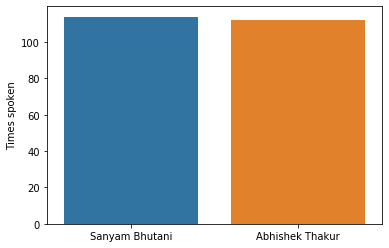

In [23]:
x=episode_1.Speaker.value_counts()
sns.barplot(x.index, x)
plt.gca().set_ylabel('Times spoken')

In [26]:
episode_1[episode_1["Speaker"]=="Sanyam Bhutani"]["Text"].str.len()

0      1056
2       293
4        97
6         7
8         7
       ... 
217     120
219      18
221      13
223      30
225     300
Name: Text, Length: 114, dtype: int64

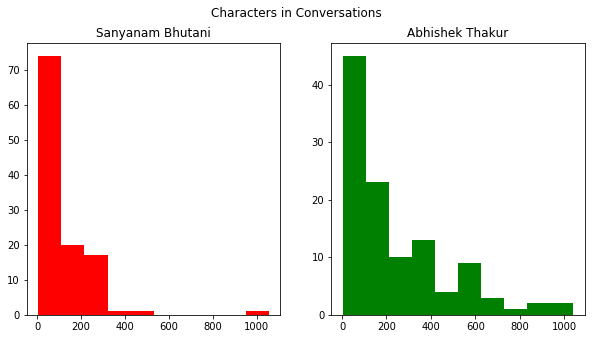

In [29]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
sany_len = episode_1[episode_1["Speaker"]=="Sanyam Bhutani"]["Text"].str.len()
ax1.hist(sany_len,color='red')
ax1.set_title('Sanyanam Bhutani')
abhi_len = episode_1[episode_1["Speaker"]=="Abhishek Thakur"]["Text"].str.len()
ax2.hist(abhi_len,color='green')
ax2.set_title('Abhishek Thakur')
fig.suptitle('Characters in Conversations')
plt.show()


## No of words in tweets

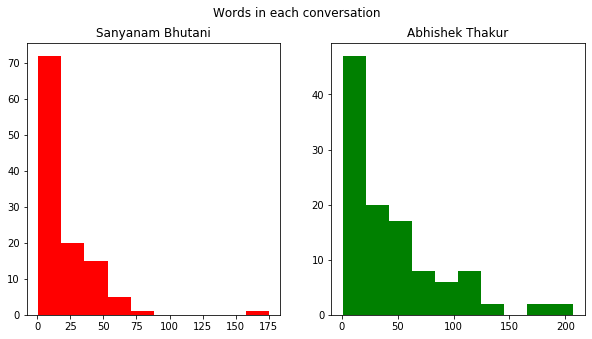

In [31]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
sany_len = episode_1[episode_1["Speaker"]=="Sanyam Bhutani"]["Text"].str.split().map(lambda x: len(x))
ax1.hist(sany_len,color='red')
ax1.set_title('Sanyanam Bhutani')
abhi_len = episode_1[episode_1["Speaker"]=="Abhishek Thakur"]["Text"].str.split().map(lambda x: len(x))
ax2.hist(abhi_len,color='green')
ax2.set_title('Abhishek Thakur')
fig.suptitle('Words in each conversation')
plt.show()

In [12]:
episode_2 = pd.read_csv('input/Cleaned Subtitles/E2.csv')
episode_2.head()

,Time,Speaker,Text
0,0:13,Sanyam Bhutani,"Hey, this is Sanyam Bhutani and you're listeni..."
1,1:46,Sanyam Bhutani,"Hi, everyone, I'm today talking to a very spec..."
2,1:57,Ryan Chesler,"Yeah, yeah. Thanks for having me. I've seen yo..."
3,2:06,Sanyam Bhutani,"So I'm really a fan of your write up, the pers..."
4,2:32,Ryan Chesler,"Yeah, yeah. It really was just looking at YouT..."


Text(0, 0.5, 'Times spoken')

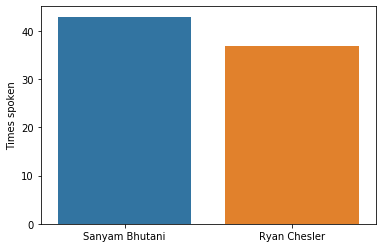

In [22]:
x = episode_2.Speaker.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('Times spoken')

In [14]:
episode_1['Text'].loc[0]

'Hey, this is Sanyam Bhutani and you\'re listening to "Chai Time Data Science", a podcast for data science enthusiasts, where I interview practitioners, researchers, and Kagglers about their journey, experience, and talk all things about data science.\n\nSanyam Bhutani  0:46  \nHello, and welcome to the first episode. This is also part 26 of interview with machine learning heroes. In this episode, I\'m honored to be joined by Abhishek Thakur, chief data scientist at boost.ai, and also the world\'s first, and at the time of recording, only triple Grand Master on Kaggle. Abhishek has been working as a data scientist for the past few years. He also has a background in computer science with a master\'s degree from the University of Bonn. We talked about his journey into data science, his Kaggle experience and his current projects. Enjoy the show.\n\nSanyam Bhutani  1:38  \nHi, everyone. Thanks for tuning in. I\'m really honored to be talking to the world\'s first triple Grand Master today.

In [15]:
episode_n = pd.read_csv('input/Cleaned Subtitles/E75.csv')

In [16]:
intro_n = episode_n['Text'].loc[0]

In [17]:
len(intro_n)

1852

In [18]:
intro_1 = episode_1['Text'].loc[0]
len(intro_1)

1056

## What are the future plans for Chai time data science?

- what are the top enhancements or changes you're working on for CTDS? Anything to look forward to, in the near future?

In [19]:
ama_episode = pd.read_csv('input/Cleaned Subtitles/E69.csv')

In [20]:
ama_episode['Text'][1]

'The next question is from Rohan Rao who\'s a data scientist at h2o Kaggle Grand Master and also worldwide known sodoku champion, what are the top enhancements or changes you\'re working on for CTDS? Anything to look forward to, in the near future? Uh funny story. The branding idea of CTDS actually came from Rohan, thanks to his suggestion. And yes, there are a lot of exciting things that I am I\'ve been working on. So three things. I\'m launching a new podcast. Yes, a new podcast called "Chai Time Data Science News" CTDS.news. You can find another write up that will live with this blog post. You can read all about it. But the idea is to give you a short news podcast, ideally in three to five minutes, always less than 10 minutes for you to be able to be on top of data science news, basically. Now if you know me, I am completely community driven. So if you have any thoughts around around that, please let me know the first episode is supposed to go live somewhere in the first week of Jun

And yes, there are a lot of exciting things that I am I\'ve been working on. So three things. I\'m launching a new podcast. Yes, a new podcast called "Chai Time Data Science News" CTDS.news. You can find another write up that will live with this blog post. You can read all about it. But the idea is to give you a short news podcast, ideally in three to five minutes, always less than 10 minutes for you to be able to be on top of data science news, basically. Now if you know me, I am completely community driven. So if you have any thoughts around around that, please let me know the first episode is supposed to go live somewhere in the first week of June, so in a few days from now, but we\'ll see how that goes. Secondly, you as you might know, I have been subtitling, every single one of the interview that goes out is all of the two interviews that go out and have been going on since January. And now I will be starting a blog version release of these also in the first week of June or probably before that. So you can read you can expect blog releases and also short, interesting parts of the conversation short clips. I was going to call it cutting chai shorts from "Chai Time Data Science.\' So really excited about that. I also have a new set a new camera a new mic my new look. But we\'ll see how that goes. The "Chai Time Data Science" story, how did it all begin? So, I have been interviewing my heroes on machine learning in a blog format. And I started that in my third year of studies third year of university. I did almost 25 interviews but after a point did it start I started feeling it was getting repetitive. My questions were getting repetitive and I I didn\'t want to just go out there and waste these amazing people that were giving me their time, their time. Also, to me it was feeling like I was asking these heroes of mine to write the blog posts for me It means that that\'s how it would fit into my pipe and I\'ll send them in questions they would write the answers back. Another thing that I really wanted to do was I, luckily, was able to interview many Kaggle Grand Masters many Kaggle Masters. And I wanted to apply their advice myself. So this might not happen in parallel, but I focus more on Kaggle, I really focus on Kaggle at least so six, seven months that I was active on the platform. And right around the last few months of my activity, I actually made it to the finals of the Google air residency programme. So I was also freelancing at that time freelancing because you\'re not allowed to have a job job in college. And I had opted out of college placement. So in India, your college helps you get a job. I had opted out of that very boldly because I didn\'t see any machine learning related roles. I was gonna my I thought might as well just get if I really want to do this if, if I\'m not confident enough, why dare I say that I\'d love to be a part of this field. So I did that. And if you have worked in consulting or freelancing, you know, when it rains, it pours. And when it doesn\'t, it\'s drier than a desert. So the Google a residency'